In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from cur import *
from neuropacks import NHP
from pyuoi.decomposition import UoI_CUR, CUR

%matplotlib inline

In [2]:
monkeys = [
    'indy_20160407_02',
    'indy_20160411_01',
    'indy_20160411_02',
    'indy_20160418_01',
    'indy_20160419_01',
    'indy_20160420_01',
    'indy_20160426_01',
    'indy_20160622_01'
]

In [3]:
uoi_decoding_x = []
uoi_decoding_y = []
cur_decoding_x = []
cur_decoding_y = []

In [4]:
for monkey in monkeys:
    print(monkey)
    data_path = '/Users/psachdeva/data/NHP/' + monkey + '.mat'
    cur_results, uoi_results = decoding_comparison_nhp(
        data_path=data_path, bin_width=0.25, region='M1'
    )
    
    cur_decoding_x.append(cur_results[1])
    cur_decoding_y.append(cur_results[2])
    uoi_decoding_x.append(uoi_results[1])
    uoi_decoding_y.append(uoi_results[2])

indy_20160407_02
indy_20160411_01
indy_20160411_02
indy_20160418_01
indy_20160419_01
indy_20160420_01
indy_20160426_01
indy_20160622_01


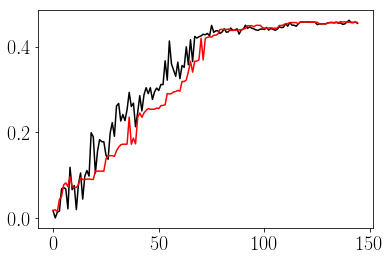

In [21]:
plt.plot(np.median(cur_decoding_y[1], axis=1), color='k')
plt.plot(np.median(uoi_decoding_y[1], axis=1), color='r')

In [23]:
f = h5py.File('/Users/psachdeva/fits/uoineuro/cur/cur.h5', 'a')
for idx, monkey in enumerate(monkeys):
    group = f.require_group(monkey)
    group['decoding_x_uoi'] = uoi_decoding_x[idx]
    group['decoding_y_uoi'] = uoi_decoding_y[idx]
    group['decoding_x_cur'] = cur_decoding_x[idx]
    group['decoding_y_cur'] = cur_decoding_y[idx]
    
f.close()